## Mô hình ARIMA trong timeseries

### Phương pháp trung bình trượt kết hợp tự hồi quy (AR +I+ MA)

#### Mô hình ARIMA(p, d, q):
- `p`: biểu thị số các số hạng tự hồi quy.
- `d`: biểu thị số lần chuỗi thời gian phải được tính sai phân cho tới khi có tính dừng.
- `q`: biểu thị số các số hạng trung bình trượt. 

#### Phương pháp luận Box - Jenkins: 
Chuỗi thời gian có tính dừng hay chuỗi thời gian có tính dừng khi thực hiện một hay nhiều phép sai phân.

- Bước 1: Tìm các giá trị thích hợp của p, d, q. Sử dụng biểu đồ tương quan và biểu đồ tương quan riêng phần.
- Bước 2: Ước lượng.
- Bước 3: Kiểm tra sự phù hợp của mô hình.
- Bước 4: Dự báo.

### 1. Cài đặt mô hình bằng thư viện

#### Lựa chọn dữ liệu

Dữ liệu sản xuất công nghiệp điện và khí đốt tại Hoa Kỳ từ năm 1939 đến năm 2020 với tần suất theo tháng.

data frame shape:  (980, 1)


,Quantity
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


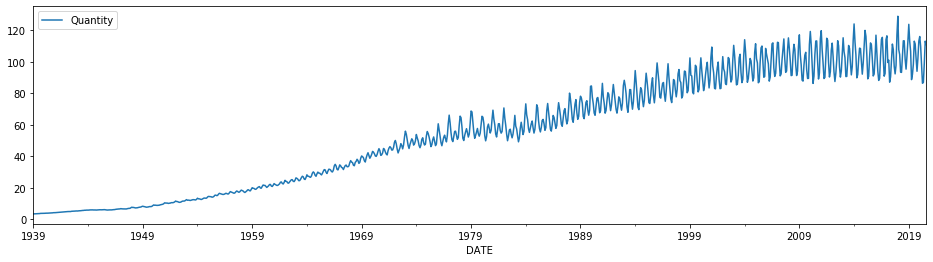

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_season = pd.read_csv('data.csv', parse_dates=['DATE'], index_col='DATE')
df_season.columns = ['Quantity']
print('data frame shape: ', df_season.shape)
df_season.plot(figsize=(16, 4))
df_season.head(5)

Ta nhận thấy chuỗi có chu kì là 1 năm. Nhu cầu tiêu thụ điện và gas tăng vào những tháng mùa đông do nhu cầu sưởi ấm tăng cao. Ngoài ra chúng ta có thể sử dụng một phép phân rã mùa vụ (seasonal decompose) để trích lọc ra các thành phần cấu thành nên chuỗi bao gồm: xu hướng (trend), mùa vụ (seasonal), phần dư (residual).

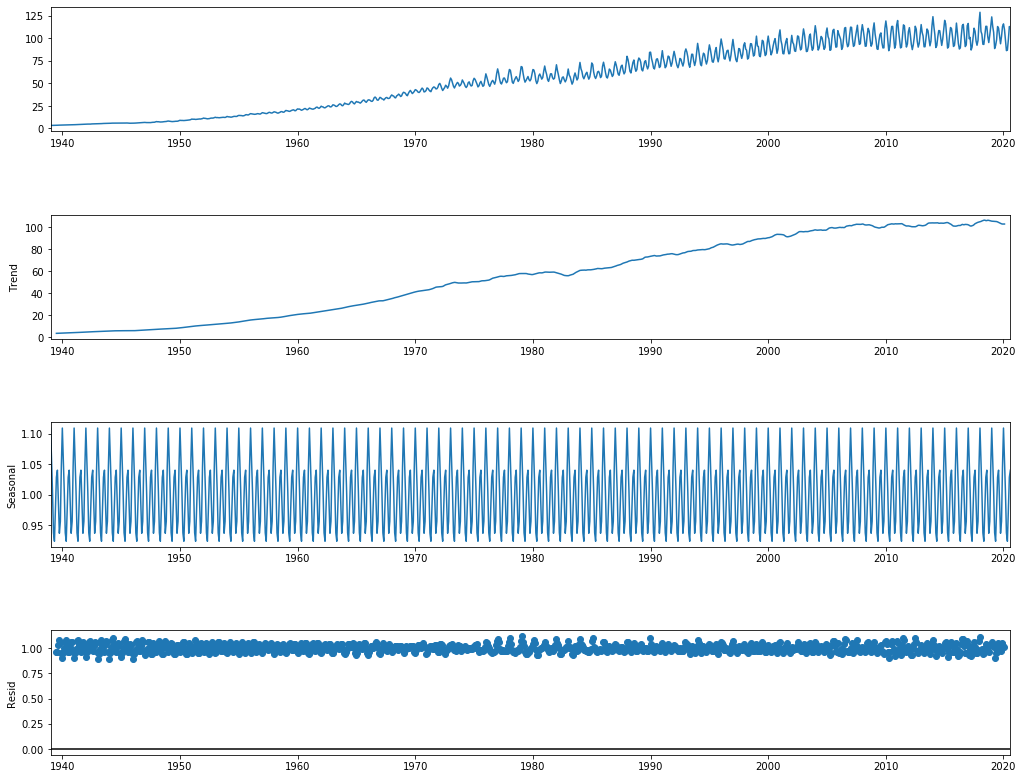

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_season, model='multiplicative')
fig = result.plot()
fig.set_size_inches(16, 12)

#### Hồi quy mô hình ARIMA

Phân chia tập train/test sao cho trước năm 2019 sẽ là dữ liệu train và sau năm 2019 là dữ liệu test.

Vẽ các biểu đồ tự tương quan và tương quan riêng phần.

Tự tương quan (ACF - AutoCorrelation Function) tìm ra độ trễ của quá trình trung bình trượt `MA(q)`.

Tự tương quan riêng phần (PACF - Partitial AutoCorrelation Function) tìm ra hệ số bậc tự do `p` của quá trình tự hồi quy `AR(p)`.

train shape:  (960, 1)
test shape:  (20, 1)


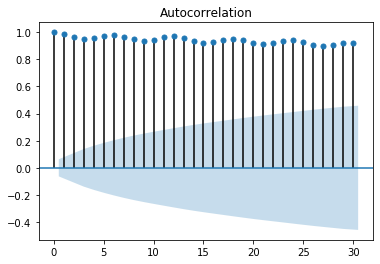

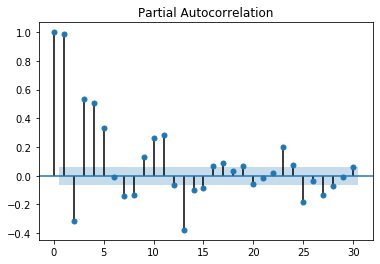

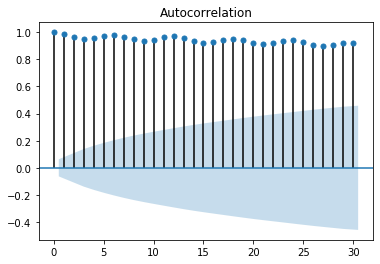

In [3]:
train, test = df_season[df_season.index < '2019-01-01'], df_season[df_season.index >= '2019-01-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_pacf(train)
plot_acf(train)


Chiến lược stepwise sẽ tự động tìm cho ta một mô hình tốt nhất dựa trên tham số đã thiết lập.

In [4]:
from pyramid.arima import auto_arima
model_sarima = auto_arima(train, start_p=0, start_q=0,
                           max_p=15, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_sarima.aic())
model_sarima.summary()


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=3956.890, BIC=3971.450, Fit time=1.791 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4269.156, BIC=4278.862, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4103.825, BIC=4123.238, Fit time=0.927 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3897.616, BIC=3917.030, Fit time=1.267 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3895.912, BIC=3920.179, Fit time=1.757 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4066.599, BIC=4086.012, Fit time=0.563 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3887.926, BIC=3917.046, Fit time=5.407 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3764.252, BIC=3798.225, Fit time=13.804 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=3922.115, BIC=3951.235, Fit time=3.176 seconds
Fit ARIMA: order=(1, 1, 2) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  960
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1852.398
Date:                            Sun, 11 Oct 2020   AIC                           3724.796
Time:                                    19:28:06   BIC                           3773.329
Sample:                                         0   HQIC                          3743.291
                                            - 960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.002      0.153      0.879      -0.003       0.004
ar.L1          0.0094      0.214      0.044      0.965      -0.410       0.429
ar.L2          0.2068      0.129      1.606      0.108      -0.046       0.459
ma.L1         -0.3707      0.211     -1.760      0.078      -0.784       0.042
ma.L2         -0.4957      0.198     -2.499      0.012      -0.884      -0.107
ar.S.L12       0.7439      0.055     13.477      0.000       0.636       0.852
ar.S.L24      -0.3218      0.027    -11.997      0.000      -0.374      -0.269
ma.S.L12      -1.4111      0.055    -25.696      0.000      -1.519      -1.303
ma.S.L24       0.6397      0.042     15.395      0.000       0.558       0.721
sigma2         2.8880      0.078     36.945      0.000       2.735       3.041
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               702.03
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):             144.21   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Mô hình được chọn lựa ARIMA (2, 1, 2, 12)

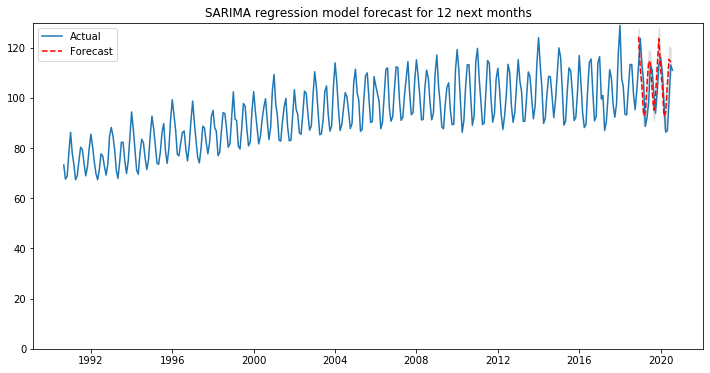

In [5]:
n_pred_perious = 20
fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='MS')

fitted_seri = pd.Series(fitted, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(df_season[-360:], label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
plt.fill_between(date, 
                 lower, 
                 upper,
                 color='grey', alpha=0.2)
plt.ylim((0, 130))
plt.legend()
plt.title('SARIMA regression model forecast for 12 next months')
plt.show()

Đánh giá sai số

In [6]:
import numpy as np
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Trung bình tổng bình phương sai số, Mean Square Error: {}'.format(mse))
  print('Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế, Root Mean Square Error: {}'.format(rmse))
  print('Trung bình trị tuyệt đối sai số, Mean Absolute Error: {}'.format(mae))
  print('Trung bình phần trăm trị tuyệt đối sai số, Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

In [7]:
mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)

Trung bình tổng bình phương sai số, Mean Square Error: 381.9902924615472
Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế, Root Mean Square Error: 19.544571943676516
Trung bình trị tuyệt đối sai số, Mean Absolute Error: 17.121109370376455
Trung bình phần trăm trị tuyệt đối sai số, Mean Absolute Percentage Error: 0.13781342490129617


### 2. Cài đặt mô hình

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.options.mode.chained_assignment = None  # default='warn'

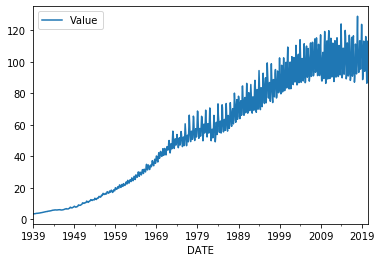

In [9]:
df = pd.read_csv('data.csv',parse_dates=True,index_col='DATE')
df.columns=['Value']
df.head()
df.plot()

Xây dựng các hàm:
    - AR
    - MA
Các bước làm:
1. Đưa chuỗi thời gian về chuỗi dừng.
2. Xây dựng mô hình tự hồi quy AR.
3. Xây dựng quá trình trung bình trượt MA.
4. Dự báo với dữ liệu.

In [10]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Value'].shift(i)
  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Value'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

In [11]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

In [12]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

Chuyển chuỗi về sai phân bậc 1 theo công thức logarit

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.376386128125554
p-value : 8.700175833097985e-11
Number of Lags Used : 22
Number of Observations Used : 944
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


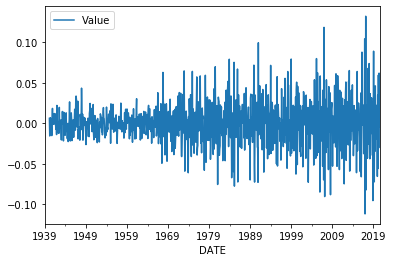

In [13]:
df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
adf_check(df_testing.Value.dropna())
df_testing.plot()

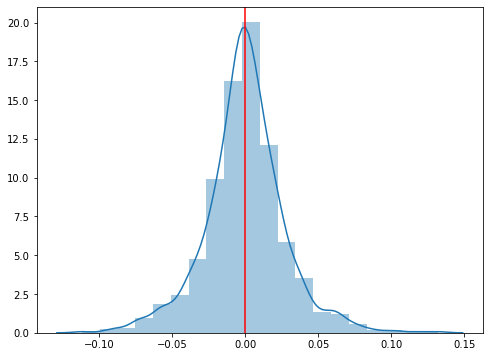

In [31]:
import seaborn as sns
mean = np.nanmean(df_testing)
plt.figure(figsize = (8, 6))
sns.distplot(df_testing, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')


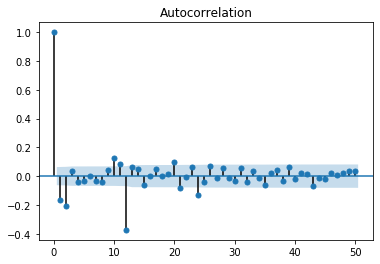

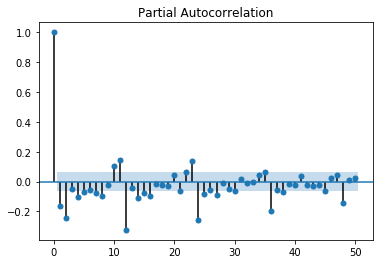

In [14]:
ACF = plot_acf(df_testing.dropna(),lags=50)
PACF = plot_pacf(df_testing.dropna(),lags=50)

Sử dụng mô hình tự hồi quy AR, chọn chỉ số `p` với sai số nhỏ nhất.

In [15]:
best_RMSE=100000000000
best_p = -1

for i in range(1,21):
  [df_train,df_test,theta,intercept,RMSE] = AR(i,pd.DataFrame(df_testing.Value))
  if(RMSE<best_RMSE):
    best_RMSE = RMSE
    best_p = i
  
print(best_p)

The RMSE is : 0.039534140776419625 , Value of p :  1
The RMSE is : 0.03816479730604478 , Value of p :  2
The RMSE is : 0.03833261913905332 , Value of p :  3
The RMSE is : 0.0380344802141753 , Value of p :  4
The RMSE is : 0.03798467874541893 , Value of p :  5
The RMSE is : 0.038013771948147465 , Value of p :  6
The RMSE is : 0.03796669914074933 , Value of p :  7
The RMSE is : 0.03767200069079197 , Value of p :  8
The RMSE is : 0.037708604019741264 , Value of p :  9
The RMSE is : 0.03788507809220413 , Value of p :  10
The RMSE is : 0.037518129998488775 , Value of p :  11
The RMSE is : 0.036061665267999005 , Value of p :  12
The RMSE is : 0.03635180597788697 , Value of p :  13
The RMSE is : 0.03652142439477511 , Value of p :  14
The RMSE is : 0.03674057691628458 , Value of p :  15
The RMSE is : 0.03626581518619699 , Value of p :  16
The RMSE is : 0.036275770934990965 , Value of p :  17
The RMSE is : 0.03628796348569742 , Value of p :  18
The RMSE is : 0.03627949525897882 , Value of p :  

Như vậy `p=12` với RMSE: 0.036061665267999005

The RMSE is : 0.036061665267999005 , Value of p :  12


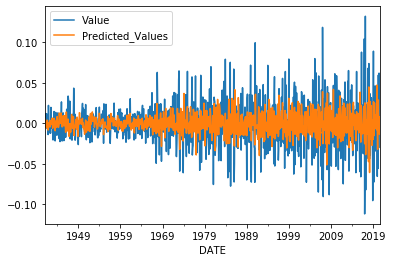

In [16]:
[df_train,df_test,theta,intercept,RMSE] = AR(best_p,pd.DataFrame(df_testing.Value))
df_c = pd.concat([df_train,df_test])
df_c[['Value','Predicted_Values']].plot()

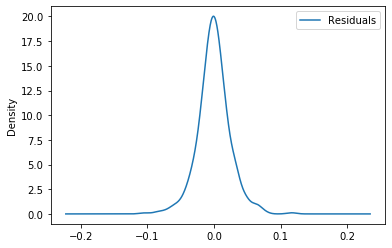

In [17]:
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values
res.plot(kind='kde')

Sử dụng MA chọn ra tham số `q` tốt nhất.

The RMSE is : 0.03643819726617985 , Value of q :  1
The RMSE is : 0.036207187063828694 , Value of q :  2
The RMSE is : 0.03638512930495425 , Value of q :  3
The RMSE is : 0.03637519762144334 , Value of q :  4
The RMSE is : 0.03645266715722889 , Value of q :  5
The RMSE is : 0.03643952706776339 , Value of q :  6
The RMSE is : 0.036424709723480775 , Value of q :  7
The RMSE is : 0.03642476517886161 , Value of q :  8
The RMSE is : 0.03646039762952564 , Value of q :  9
The RMSE is : 0.03647112226342137 , Value of q :  10
The RMSE is : 0.03653705356675222 , Value of q :  11
The RMSE is : 0.036384615958761635 , Value of q :  12
2


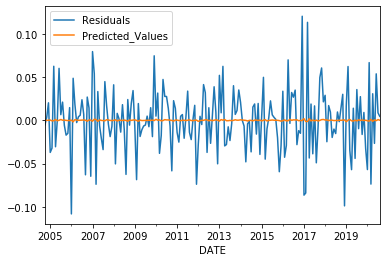

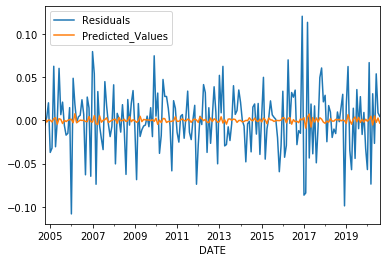

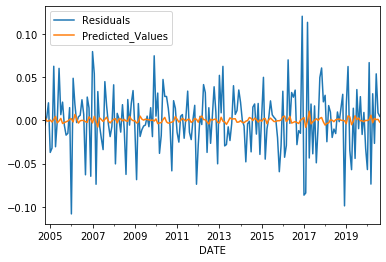

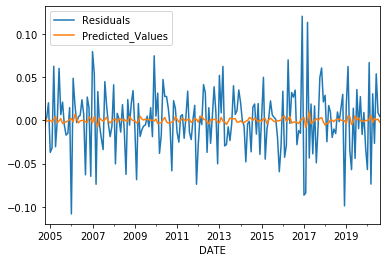

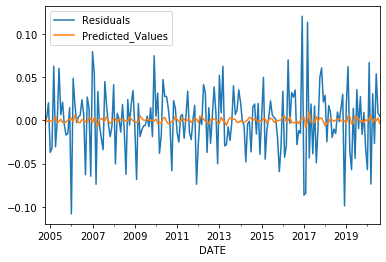

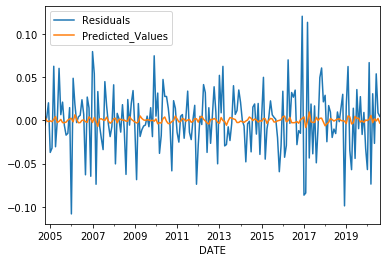

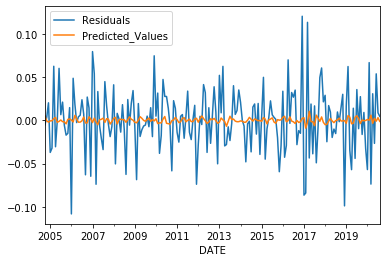

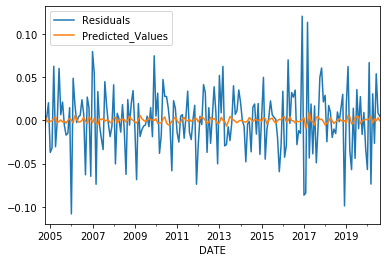

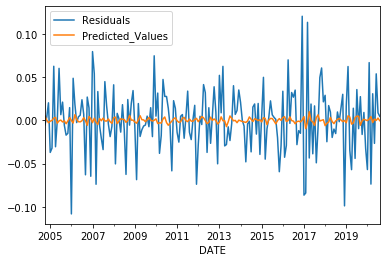

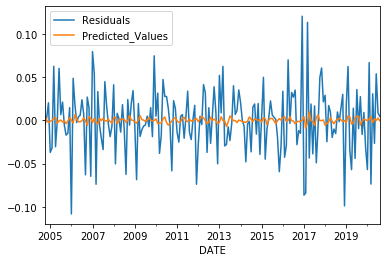

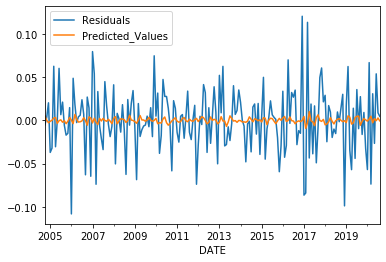

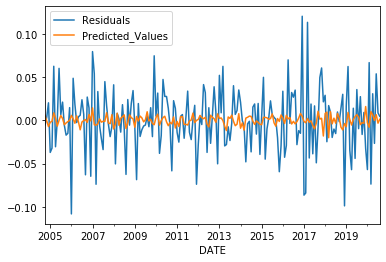

In [18]:
best_RMSE=100000000000
best_q = -1

for i in range(1,13):
  [res_train,res_test,theta,intercept,RMSE] = MA(i,pd.DataFrame(res.Residuals))
  if(RMSE<best_RMSE):
    best_RMSE = RMSE
    best_q = i
  
print(best_q)

The RMSE is : 0.036207187063828694 , Value of q :  2


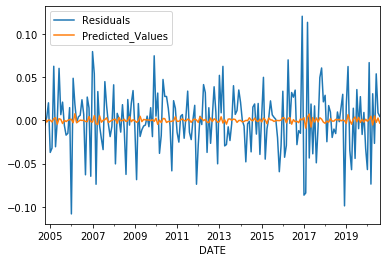

In [19]:
[res_train,res_test,theta,intercept,RMSE] = MA(best_q,pd.DataFrame(res.Residuals))

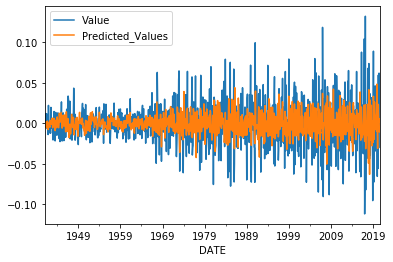

In [20]:
res_c = pd.concat([res_train,res_test])
df_c.Predicted_Values += res_c.Predicted_Values
df_c[['Value','Predicted_Values']].plot()

Đưa dữ liệu về ban đầu và dự đoán.

In [21]:
df_c.Value += np.log(df).shift(1).Value
df_c.Value += np.log(df).diff().shift(12).Value
df_c.Predicted_Values += np.log(df).shift(1).Value 
df_c.Predicted_Values += np.log(df).diff().shift(12).Value
df_c.Value = np.exp(df_c.Value)
df_c.Predicted_Values = np.exp(df_c.Predicted_Values)

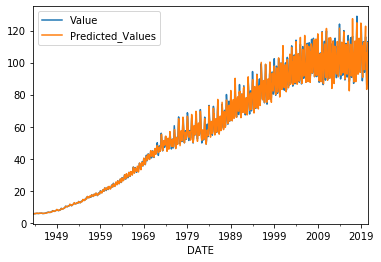

In [22]:
df_c.iloc[30:,:][['Value','Predicted_Values']].plot()

In [23]:
#df_c

In [24]:
y = df_c["Value"]
y_hat = df_c["Predicted_Values"]

In [36]:
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Trung bình tổng bình phương sai số, Mean Square Error: {}'.format(mse))
  print('Độ lệch chuẩn của chuỗi dự báo so với thực tế, Root Mean Square Error: {}'.format(rmse))
  print('Trung bình trị tuyệt đối sai số, Mean Absolute Error: {}'.format(mae))
  #print('Trung bình phần trăm trị tuyệt đối sai số, Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

In [28]:
_measure_metric(y, y_hat)

Trung bình tổng bình phương sai số, Mean Square Error: 4.393597741257532
Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế, Root Mean Square Error: 2.0960910622531483
Trung bình trị tuyệt đối sai số, Mean Absolute Error: 1.2494557696714292


(4.393597741257532,
 2.0960910622531483,
 1.2494557696714292,
 -0.0002986846938703947)

In [32]:
mean = np.nanmean( df_c["Value"])

In [37]:
2.0960910622531483/mean

0.03707157936471384